In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

C:\Users\Bohe Rana\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [155]:
df = pd.read_csv('inventory.csv')
df0 =  pd.read_csv('states0.csv')
df1 =  pd.read_csv('states1.csv')
df2 =  pd.read_csv('states2.csv')
df3 =  pd.read_csv('states3.csv')
df4 =  pd.read_csv('states4.csv')
df5 =  pd.read_csv('states5.csv')
df6 =  pd.read_csv('states6.csv')
df7 =  pd.read_csv('states7.csv')
df8 =  pd.read_csv('states8.csv')
df9 =  pd.read_csv('states9.csv')

In [156]:
us_census= pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9],axis=0)

In [157]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [158]:
us_census.drop('Unnamed: 0',axis = 1,inplace = True)

In [159]:
us_census.reset_index(drop=True,inplace=True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [160]:
us_census.drop_duplicates()
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [161]:
a = us_census.GenderPop.apply(lambda x: x.split("_"))


In [162]:
us_census['male'] = us_census['GenderPop'].apply(lambda x: x.split('_')[0])
us_census['female'] = us_census['GenderPop'].apply(lambda x: x.split('_')[1])

In [163]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male,female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F,19087135M,19334329F


In [164]:
us_census['male'] = us_census.male.apply(lambda x: x[0:-1])
us_census['female'] = us_census.female.apply(lambda x: x[0:-1])

In [165]:
us_census['female'] = us_census.female.replace('',np.nan).astype(float)

In [166]:
us_census['male'] = us_census.male.astype(float)

In [167]:
us_census['Income'] = us_census.Income.apply(lambda x: x[1:]).astype(float)
us_census['female'].fillna(3222092.5,inplace = True)

In [168]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male,female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093.0,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160.0,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088.0,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913.0,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135.0,19334329.0


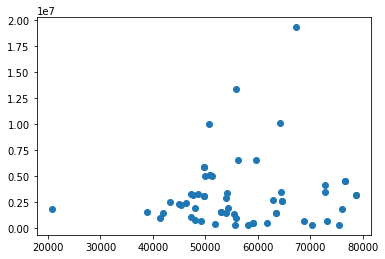

In [169]:
plt.scatter(us_census.Income,us_census.female)
plt.show()

In [173]:
us_census['Pacific'] =  us_census.Pacific.replace(np.nan,'0')


In [180]:
us_census.Pacific

0       0.03435374149659865
1        1.0586826347305378
2       0.16763157894736833
3       0.14686131386861315
4       0.35141038442336353
5                          
6                          
7      0.018599033816425123
8                          
9      0.029608938547486034
10      0.05151006711409391
11     0.046601941747572824
12     0.046601941747572824
13        8.758860759493672
14       0.1271812080536914
15      0.02003210272873195
16      0.03262458471760798
17     0.055164034021871235
18     0.055164034021871235
19                         
20     0.046438232642019836
21     0.039184397163120555
22      0.01566951566951567
23      0.03628509719222463
24      0.03628509719222463
25       0.0198087431693989
26      0.01954941860465116
27     0.032908545727136446
28     0.015045592705167175
29      0.10165706051873193
30      0.10165706051873193
31      0.07222222222222222
32      0.05714285714285715
33       0.5745213549337267
34     0.016095890410958904
35     0.03131868131

In [176]:
us_census['Pacific'].apply(lambda x: x[0:-1])
us_census['Pacific'] =  us_census.Pacific.replace('','0')

In [177]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male,female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093.0,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160.0,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088.0,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913.0,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135.0,19334329.0


In [178]:
us_census['Hispanic'] = us_census['Hispanic'].apply(lambda x: x[0:-1])
us_census['White'] = us_census['White'].apply(lambda x: x[0:-1])
us_census['Black'] = us_census['Black'].apply(lambda x: x[0:-1])
us_census['Native'] = us_census['Native'].apply(lambda x: x[0:-1])
us_census['Asian'] = us_census['Asian'].apply(lambda x: x[0:-1])
us_census['Pacific'] = us_census['Pacific'].apply(lambda x: x[0:-1])


In [181]:
us_census['Pacific'] =  us_census.Pacific.replace('','0')

In [182]:
us_census['Hispanic'] = us_census.Hispanic.astype(float)
us_census['White'] = us_census['White'].astype(float)
us_census['Black'] = us_census['Black'].astype(float)
us_census['Native'] = us_census['Native'].astype(float)
us_census['Asian'] = us_census['Asian'].astype(float)
us_census['Pacific'] = us_census['Pacific'].astype(float)

In [183]:
us_census.drop_duplicates()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male,female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093.0,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160.0,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088.0,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913.0,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135.0,19334329.0
5,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,0.000000,64657.801787,2648667M_2630239F,2648667.0,2630239.0
7,Connecticut,3593222,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,76146.560588,1751607M_1841615F,1751607.0,1841615.0
8,Delaware,926454,8.824766,64.632710,20.743925,0.259813,3.268692,0.000000,61827.976636,448413M_478041F,448413.0,478041.0
9,District of Columbia,647484,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,75466.363636,306674M_340810F,306674.0,340810.0
10,Florida,19645772,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510,50690.194987,9600009M_10045763F,9600009.0,10045763.0


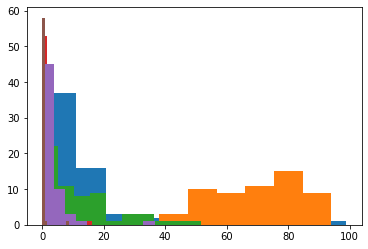

In [193]:
plt.hist(x = us_census.Hispanic)
plt.hist(x = us_census.White)
plt.hist(x = us_census.Black)
plt.hist(x = us_census.Native)
plt.hist(x = us_census.Asian)
plt.hist(x = us_census.Pacific)
plt.show()